In [1]:
import os 
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def check_consensus(row, levels):
    from collections import Counter

    # Base annotation is from the coarsest level
    base_annotation = row[levels[0]]
    
    # Create a list of Boolean values indicating if the base_annotation is present in each finer level
    presence = [base_annotation in row[level] for level in levels[1:]]
    
    # Count the number of True values
    count_present = sum(presence) + 1
    
    # Determine consensus label
    if count_present > len(levels[0:]) / 2:
        consensus_label = f'consensus {base_annotation}'
    else:
        consensus_label = 'no consensus'

    return pd.Series([consensus_label, count_present], index=['consensus', 'consensus_count'])

In [3]:
adata_path='/hpc/pmc_rios/2.personal/rariese/scseq_analysis/BRO/time_course/data/BRO_timecourse/BRO_RA1_exp023_annotated.h5ad'
reannot_path='/hpc/pmc_rios/2.personal/rariese/scseq_analysis/BRO/time_course/scripts/04_merge_annotations/reannotations/'

In [86]:
adata = sc.read_h5ad(adata_path)

In [13]:
reannots_files = os.listdir(reannot_path)
reannots_files

['reannotation_progenitors.csv', 'reannotation_mc.csv']

### Reannotate progenitors

In [15]:
prog = adata[adata.obs['hnoca_leiden_level_4'].isin(["PSC","Neuroepithelium"])].copy()
prog

AnnData object with n_obs × n_vars = 25657 × 23409
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'percent.ribo', 'nCount_SCT', 'nFeature_SCT', 'singlets', 'Day', 'n_counts', 'log_counts', 'n_genes', 'mt_fraction', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'leiden', 'leiden_res_1', 'leiden_res_2', 'leiden_res_3', 'leiden_res_4', 'S_score', 'G2M_score', 'phase', 'leiden_diffmap_res_4', 'snapseed_level_1', 'snapseed_level_2', 'snapseed_level_3', 'snapseed_level_4', 'snapseed_level_5', 'leiden_res_0.5', 'hnoca_level_1', 'hnoca_level_1_score', 'hnoca_level_1_logscore', 'hnoca_level_2', 'hnoca_level_2_score', 'hnoca_level_2_logscore', 'hnoca_level_3', 'hnoca_level_3_score', 'hnoca_level_3_logscore', 'hnoca_level_4', 'hnoca_level_4_score', 'hnoca_level_4_logscore', 'hdbca

In [19]:
prog_annot = pd.read_csv(os.path.join(reannot_path, reannots_files[0]),index_col=0)
prog_annot

,reannotation
d005_AAACCAAAGCGGAGAC-1,PSC
d005_AAACCAAAGGAGTACG-1,Neuroepithelium
d005_AAACCAAAGTAATCGT-1,PSC
d005_AAACCAAAGTTGCACA-1,PSC
d005_AAACCATTCTCACCAT-1,Neuroepithelium
...,...
d120_TGTGCCCTCGTGCTAA-1,Glioblast
d120_TGTGCCTCATGCTCAC-1,NPC
d120_TGTGCGCGTGAAGCCG-1,OPC
d120_TGTGCTGGTAAGTCGA-1,Glioblast


In [23]:
prog_annot = prog_annot[prog_annot.index.isin(prog.obs_names)]

### Reannotate MC

In [24]:
mc = adata[adata.obs['hnoca_leiden_level_4'].isin(["MC"])].copy()
mc

AnnData object with n_obs × n_vars = 7136 × 23409
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'percent.ribo', 'nCount_SCT', 'nFeature_SCT', 'singlets', 'Day', 'n_counts', 'log_counts', 'n_genes', 'mt_fraction', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'leiden', 'leiden_res_1', 'leiden_res_2', 'leiden_res_3', 'leiden_res_4', 'S_score', 'G2M_score', 'phase', 'leiden_diffmap_res_4', 'snapseed_level_1', 'snapseed_level_2', 'snapseed_level_3', 'snapseed_level_4', 'snapseed_level_5', 'leiden_res_0.5', 'hnoca_level_1', 'hnoca_level_1_score', 'hnoca_level_1_logscore', 'hnoca_level_2', 'hnoca_level_2_score', 'hnoca_level_2_logscore', 'hnoca_level_3', 'hnoca_level_3_score', 'hnoca_level_3_logscore', 'hnoca_level_4', 'hnoca_level_4_score', 'hnoca_level_4_logscore', 'hdbca_

In [25]:
mc_annot = pd.read_csv(os.path.join(reannot_path, reannots_files[1]),index_col=0)
mc_annot

,reannotation
d005_AAACCAAAGCGGAGAC-1,Neuroepithelium
d005_AAACCAAAGGAGTACG-1,Neuroepithelium
d005_AAACCAAAGTAATCGT-1,Neuroepithelium
d005_AAACCAAAGTTGCACA-1,Neuroepithelium
d005_AAACCATTCTCACCAT-1,Neuroepithelium
...,...
d120_TGTGCCCTCGTGCTAA-1,Glioblast
d120_TGTGCCTCATGCTCAC-1,Glioblast
d120_TGTGCGCGTGAAGCCG-1,OPC
d120_TGTGCTGGTAAGTCGA-1,Glioblast


In [26]:
mc_annot = mc_annot[mc_annot.index.isin(mc.obs_names)]

### Combine annotations

In [87]:
adata.obs['hnoca_leiden_level_1'] = adata.obs['hnoca_leiden_level_1'].astype(str)
prog_annot['reannotation'] = prog_annot['reannotation'].astype(str)
adata.obs.loc[adata.obs_names.isin(prog_annot.index),'hnoca_leiden_level_1'] = prog_annot['reannotation'].copy()
adata.obs.loc[adata.obs_names.isin(mc_annot.index),'hnoca_leiden_level_1'] = mc_annot['reannotation'].copy()

/scratch/25273691/ipykernel_1706663/1209076347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prog_annot['reannotation'] = prog_annot['reannotation'].astype(str)


In [88]:
adata.obs['hnoca_leiden_level_2'] = adata.obs['hnoca_leiden_level_2'].astype(str)
prog_annot['reannotation'] = prog_annot['reannotation'].astype(str)
adata.obs.loc[adata.obs_names.isin(prog_annot.index),'hnoca_leiden_level_2'] = prog_annot['reannotation'].copy()
adata.obs.loc[adata.obs_names.isin(mc_annot.index),'hnoca_leiden_level_2'] = mc_annot['reannotation'].copy()

/scratch/25273691/ipykernel_1706663/2916279542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prog_annot['reannotation'] = prog_annot['reannotation'].astype(str)


In [89]:
adata.obs['hnoca_leiden_level_3'] = adata.obs['hnoca_leiden_level_3'].astype(str)
prog_annot['reannotation'] = prog_annot['reannotation'].astype(str)
adata.obs.loc[adata.obs_names.isin(prog_annot.index),'hnoca_leiden_level_3'] = prog_annot['reannotation'].copy()
adata.obs.loc[adata.obs_names.isin(mc_annot.index),'hnoca_leiden_level_3'] = mc_annot['reannotation'].copy()

/scratch/25273691/ipykernel_1706663/794941346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prog_annot['reannotation'] = prog_annot['reannotation'].astype(str)


In [90]:
adata.obs['hnoca_leiden_level_4'] = adata.obs['hnoca_leiden_level_4'].astype(str)
prog_annot['reannotation'] = prog_annot['reannotation'].astype(str)
adata.obs.loc[adata.obs_names.isin(prog_annot.index),'hnoca_leiden_level_4'] = prog_annot['reannotation'].copy()
adata.obs.loc[adata.obs_names.isin(mc_annot.index),'hnoca_leiden_level_4'] = mc_annot['reannotation'].copy()

/scratch/25273691/ipykernel_1706663/2907879623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prog_annot['reannotation'] = prog_annot['reannotation'].astype(str)


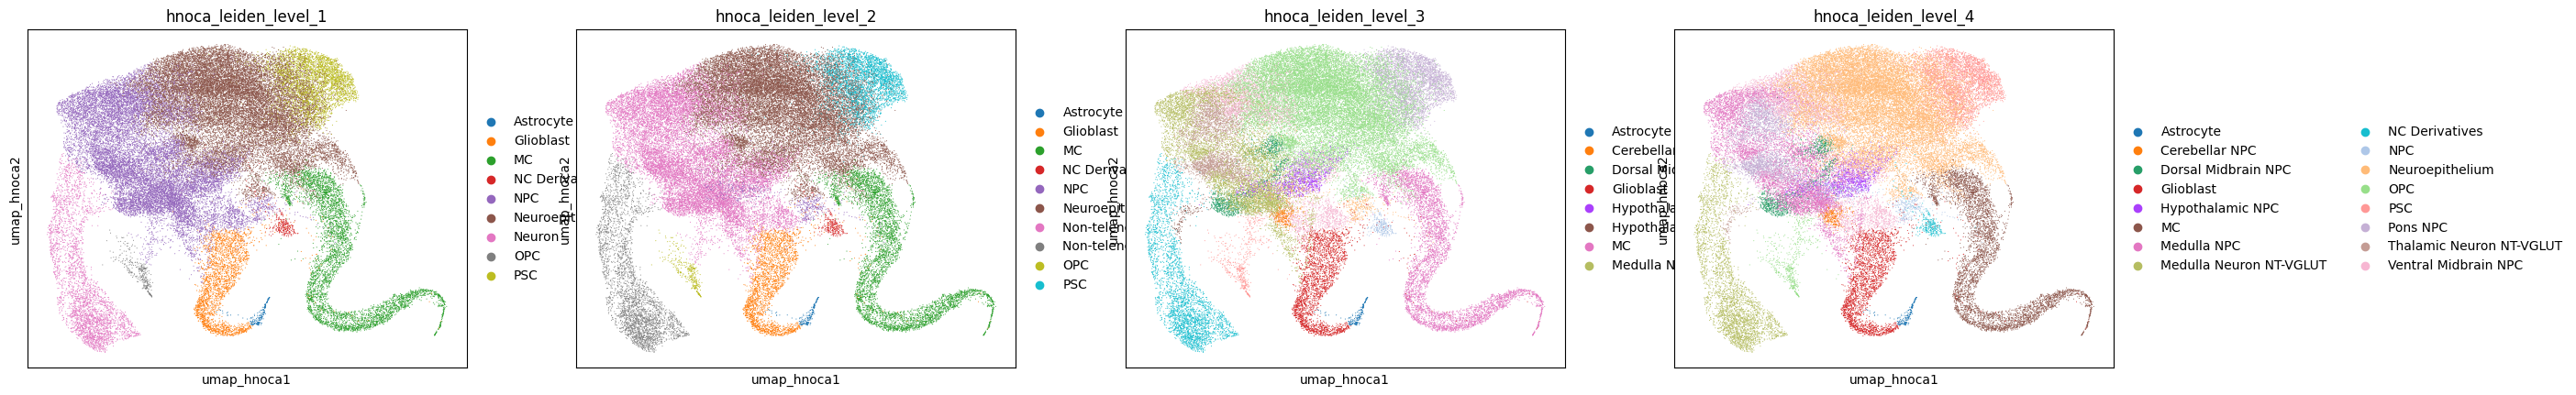

In [91]:
sc.pl.embedding(adata, color=['hnoca_leiden_level_1','hnoca_leiden_level_2','hnoca_leiden_level_3','hnoca_leiden_level_4'], basis='umap_hnoca')

That's better, we now have a single isolated MC branch and a single glioblast branch. Also looks like MC is not coming from NPC, which makes sense.
Below we do a sanity check and see if all levels of annotation of the hnoca match each other and how this compares to the hdbca

In [92]:
annotations = ["hnoca_leiden_level_1","hnoca_leiden_level_2","hnoca_leiden_level_3","hnoca_leiden_level_4"]

In [93]:
adata.obs[['consensus', 'consensus_count']] = adata.obs.apply(check_consensus, axis=1, levels=annotations)

In [94]:
print(adata.obs['consensus'].value_counts())
print("")
print(adata.obs['consensus_count'].value_counts())

consensus Neuroepithelium    21200
consensus NPC                17502
consensus MC                  5111
consensus PSC                 4137
consensus Neuron              3617
consensus Glioblast           2710
consensus OPC                  332
consensus NC Derivatives       305
no consensus                   223
consensus Astrocyte            190
Name: consensus, dtype: int64

4    55104
2      223
Name: consensus_count, dtype: int64


Looks like there are a couple not in consensus. Let's check!

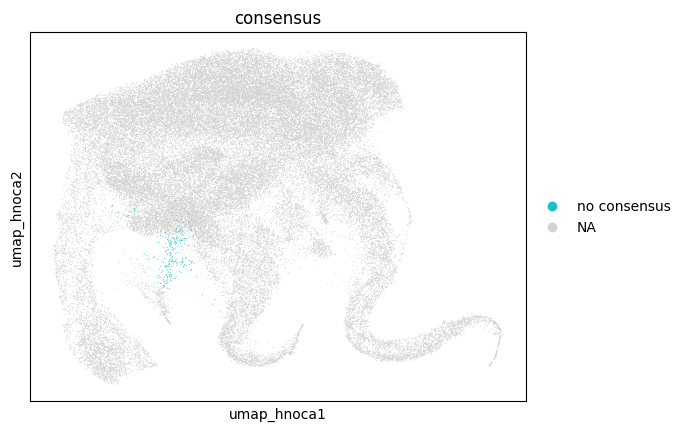

In [100]:
sc.pl.embedding(adata, color=['consensus'], basis='umap_hnoca', groups="no consensus")

In [96]:
unknown = adata[adata.obs['consensus']=="no consensus"].copy()
unknown

AnnData object with n_obs × n_vars = 223 × 23409
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'percent.ribo', 'nCount_SCT', 'nFeature_SCT', 'singlets', 'Day', 'n_counts', 'log_counts', 'n_genes', 'mt_fraction', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'leiden', 'leiden_res_1', 'leiden_res_2', 'leiden_res_3', 'leiden_res_4', 'S_score', 'G2M_score', 'phase', 'leiden_diffmap_res_4', 'snapseed_level_1', 'snapseed_level_2', 'snapseed_level_3', 'snapseed_level_4', 'snapseed_level_5', 'leiden_res_0.5', 'hnoca_level_1', 'hnoca_level_1_score', 'hnoca_level_1_logscore', 'hnoca_level_2', 'hnoca_level_2_score', 'hnoca_level_2_logscore', 'hnoca_level_3', 'hnoca_level_3_score', 'hnoca_level_3_logscore', 'hnoca_level_4', 'hnoca_level_4_score', 'hnoca_level_4_logscore', 'hdbca_l

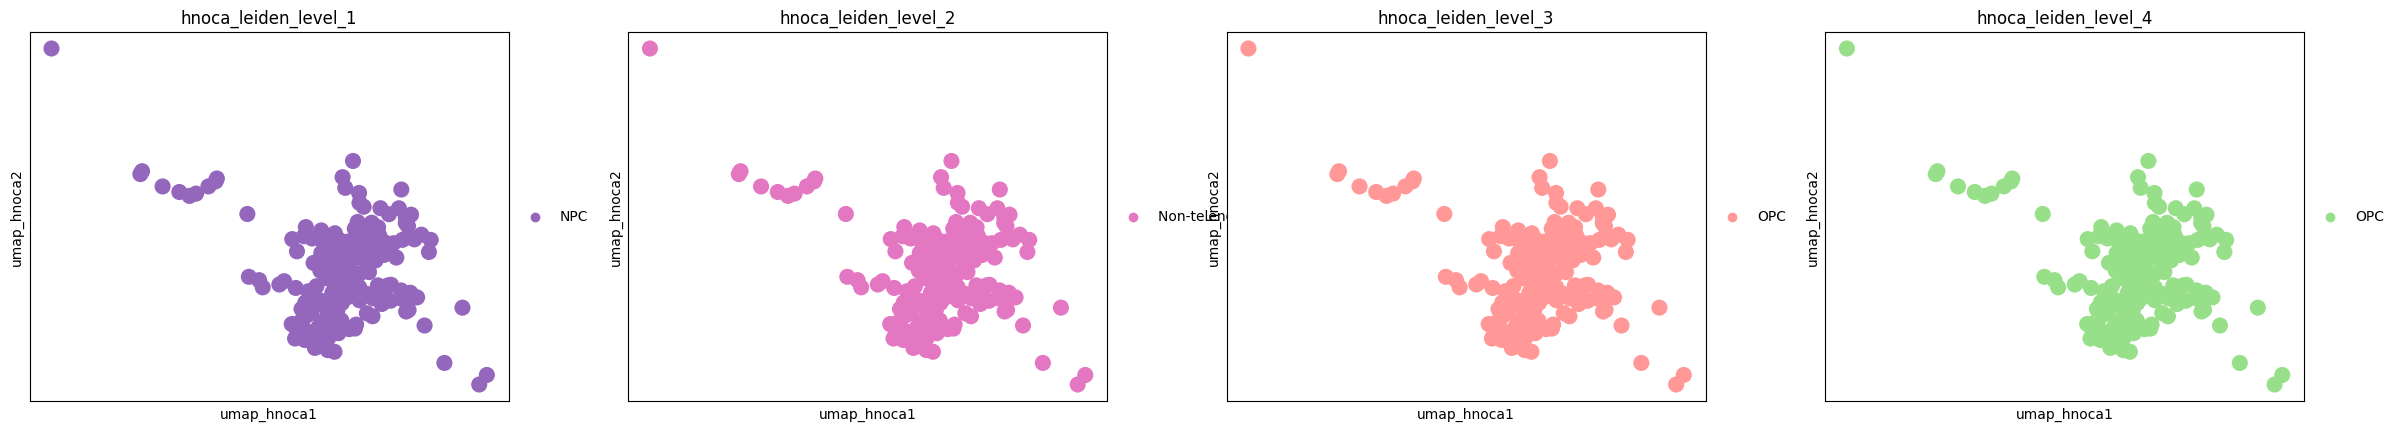

In [98]:
sc.pl.embedding(unknown, color=['hnoca_leiden_level_1','hnoca_leiden_level_2','hnoca_leiden_level_3','hnoca_leiden_level_4'], basis='umap_hnoca')

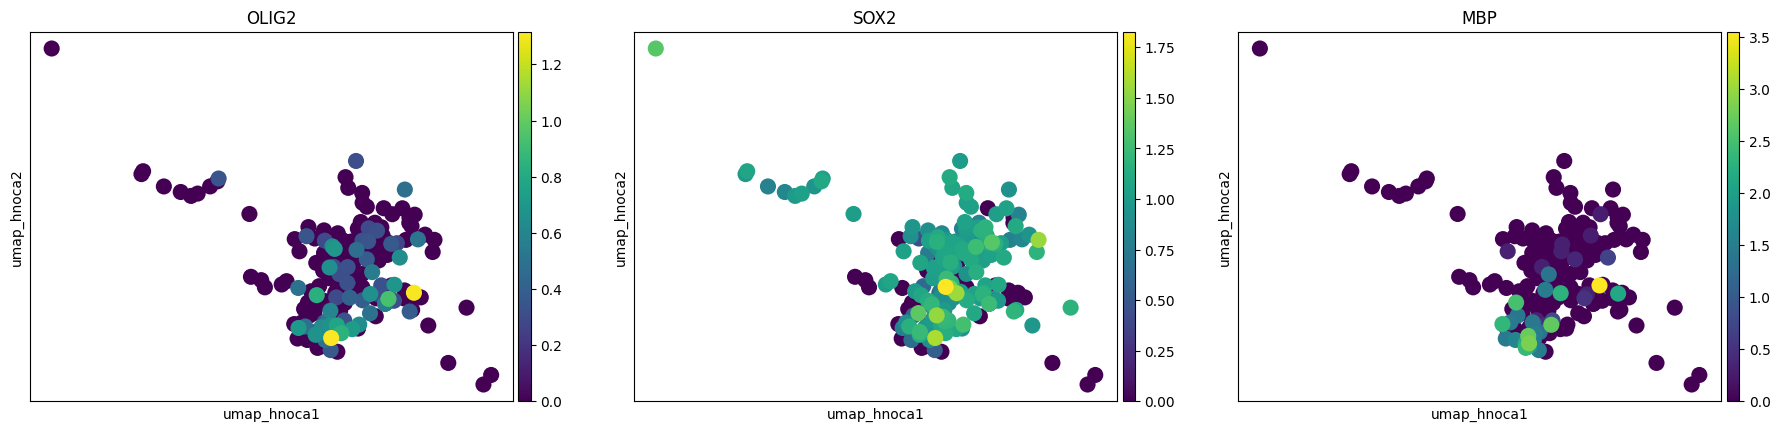

In [102]:
sc.pl.embedding(unknown, color=["OLIG2","SOX2","MBP"], basis='umap_hnoca')

Looks like OPC

In [103]:
adata.obs.loc[adata.obs_names.isin(unknown.obs_names),'hnoca_leiden_level_1'] = "OPC"
adata.obs.loc[adata.obs_names.isin(unknown.obs_names),'hnoca_leiden_level_2'] = "OPC"

In [104]:
adata.obs[['consensus', 'consensus_count']] = adata.obs.apply(check_consensus, axis=1, levels=annotations)

In [105]:
print(adata.obs['consensus'].value_counts())
print("")
print(adata.obs['consensus_count'].value_counts())

consensus Neuroepithelium    21200
consensus NPC                17502
consensus MC                  5111
consensus PSC                 4137
consensus Neuron              3617
consensus Glioblast           2710
consensus OPC                  555
consensus NC Derivatives       305
consensus Astrocyte            190
Name: consensus, dtype: int64

4    55327
Name: consensus_count, dtype: int64


In [ ]:
adata.write_h5ad("/hpc/pmc_rios/2.personal/rariese/scseq_analysis/BRO/time_course/data/BRO_timecourse/BRO_RA1_exp023_annotated_2.h5ad")